In [15]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# satss models
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tools.eval_measures import rmse

#Time aeries analysis -PDMARIMA
import pmdarima
from pmdarima.arima import auto_arima

#Time series analysis -FBPROPHET
import fbprophet
from fbprophet import Prophet

Reading the cleaed data

In [16]:
lyon = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Lyon_clean_for_ts.csv')

In [17]:
lyon.head()

,datetime,pm25,pm10,o3,no2
0,2014-01-01,26.0,10.0,23.0,14.0
1,2014-01-02,31.0,11.0,10.0,15.0
2,2014-01-03,36.0,7.0,15.0,11.0
3,2014-01-04,23.0,10.0,20.0,15.0
4,2014-01-05,33.0,15.0,17.0,16.0


In [18]:
lyon.datetime= pd.to_datetime(lyon.datetime)

In [19]:
lyon.dtypes

datetime    datetime64[ns]
pm25               float64
pm10               float64
o3                 float64
no2                float64
dtype: object

<AxesSubplot:xlabel='datetime', ylabel='pm25'>

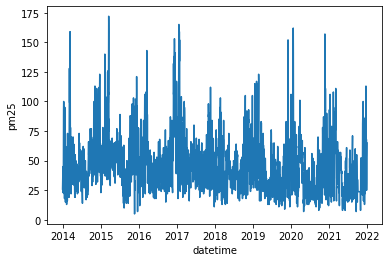

In [20]:
sns.lineplot(x='datetime', y='pm25', data=lyon)

<AxesSubplot:xlabel='datetime', ylabel='pm10'>

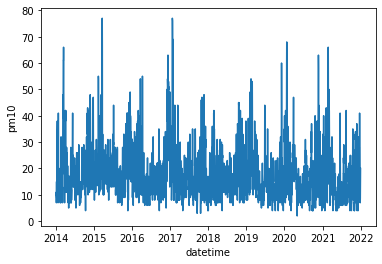

In [21]:
sns.lineplot(x='datetime', y='pm10', data=lyon)

<AxesSubplot:xlabel='datetime', ylabel='o3'>

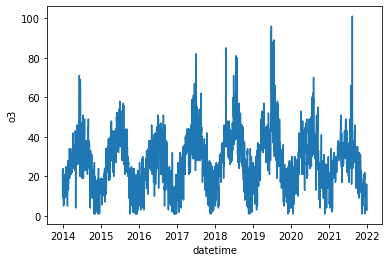

In [22]:
sns.lineplot(x='datetime', y='o3', data=lyon)

<AxesSubplot:xlabel='datetime', ylabel='no2'>

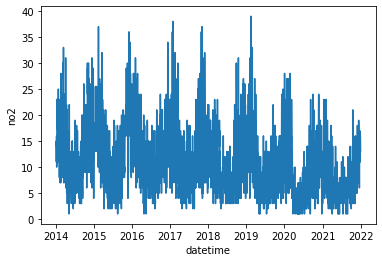

In [23]:
sns.lineplot(x='datetime', y='no2', data=lyon)

## Time series analysis of PM 2.5

In [24]:
data_pm25=lyon.pm25.tolist()
date_time = lyon.datetime.tolist()
pm25= pd.DataFrame({'ds':date_time, 'y':data_pm25})
pm25.dtypes

ds    datetime64[ns]
y            float64
dtype: object

#### Stationarity 

In [25]:
result = adfuller(pm25.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -5.90
5% Critical Value: -2.86
p-value: 0.00


In [26]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -5.895960e+00              Test Statistics
1  2.851129e-07                      p-value
2  2.700000e+01             No. of lags used
3  2.894000e+03  Number of observations used
4 -3.432612e+00          critical value (1%)
5 -2.862539e+00          critical value (5%)
6 -2.567302e+00         critical value (10%)


Basing on the Dickey - Fuller test I can conclude that the data is stationary as the p-value is below 0.05 

#### Autocorrelation

In [28]:
autocorrelation_lag1 = lyon['pm25'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = lyon['pm25'].autocorr(lag=3)
print("Three Day Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = lyon['pm25'].autocorr(lag=6)
print("Six Day Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = lyon['pm25'].autocorr(lag=9)
print("Nine Day Lag: ", autocorrelation_lag9)

One Day Lag:  0.7702978834169572
Three Day Lag:  0.4665017179611204
Six Day Lag:  0.32543908342454
Nine Day Lag:  0.23001518749494507


C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


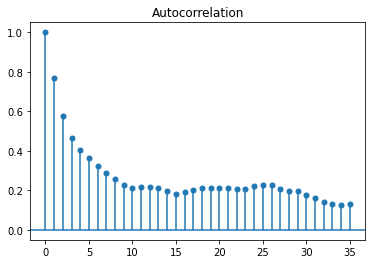

In [29]:
pmdarima.plot_acf(pm25.y)

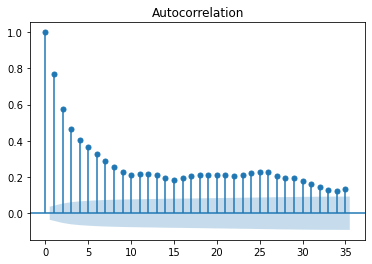

In [30]:
plot_acf(pm25.y)
plt.show()

#### Partial autocorrelation

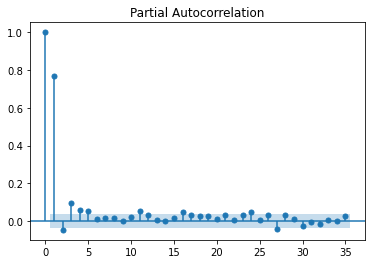

In [31]:
plot_pacf(pm25.y)
plt.show()

#### Decomposition to see the trend line

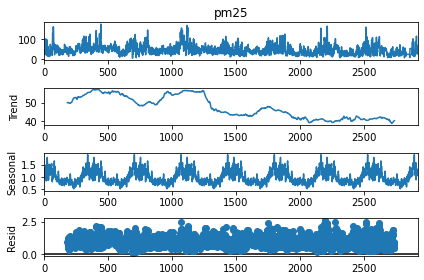

In [32]:
decompose = seasonal_decompose(lyon.pm25,model='multiplicative', period=365)
decompose.plot()
plt.show()

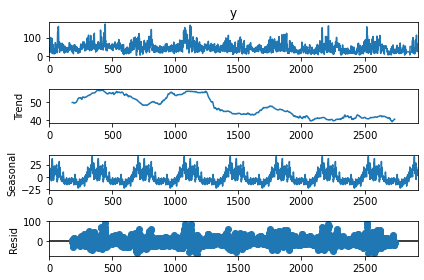

In [33]:
decompose_pm_add = seasonal_decompose(pm25.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

#### Train test split

In [34]:
(pm25.shape[0])*0.8

2337.6

In [35]:
train = pm25[:2338]
test = pm25[2338:]

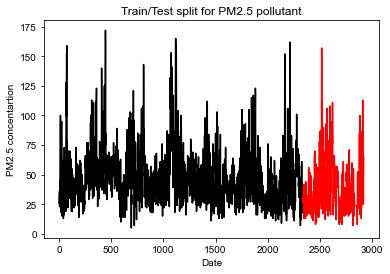

In [36]:
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM2.5 pollutant")
plt.ylabel("PM2.5 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

### Prophet 

In [37]:
# define the model
model_pm25_1 = Prophet(daily_seasonality=True)
# fit the model
model_pm25_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  32.009522    6.071719   62.208287
1 2020-05-28  33.819518    4.588983   60.718890
2 2020-05-29  33.751266    6.592582   61.613097
3 2020-05-30  32.841118    4.156313   59.686637
4 2020-05-31  31.680007    2.053721   58.117571


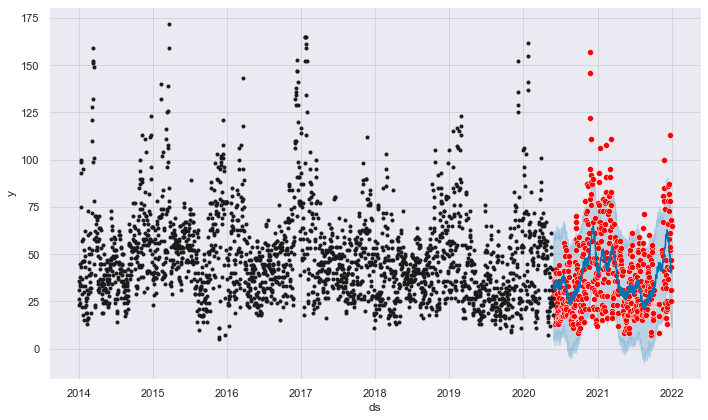

In [38]:
forecast_pm25_1 = model_pm25_1.predict(test)
# summarize the forecast
print(forecast_pm25_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm25_1.plot(forecast_pm25_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

In [39]:
future_1 = model_pm25_1.make_future_dataframe(periods=400, freq='D')
forecast1 = model_pm25_1.predict(future_1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2733,2021-06-26,20.669656,4.214785,57.715646,19.524394,21.794165,10.434168,10.434168,10.434168,17.400765,...,0.516775,0.516775,0.516775,-7.483372,-7.483372,-7.483372,0.0,0.0,0.0,31.103824
2734,2021-06-27,20.663110,1.595889,58.168200,19.516273,21.788579,9.041118,9.041118,9.041118,17.400765,...,-0.914455,-0.914455,-0.914455,-7.445192,-7.445192,-7.445192,0.0,0.0,0.0,29.704228
2735,2021-06-28,20.656563,2.126595,52.817319,19.503969,21.782994,8.023171,8.023171,8.023171,17.400765,...,-2.008079,-2.008079,-2.008079,-7.369515,-7.369515,-7.369515,0.0,0.0,0.0,28.679735
2736,2021-06-29,20.650017,0.744797,55.458706,19.493822,21.777902,8.355638,8.355638,8.355638,17.400765,...,-1.789460,-1.789460,-1.789460,-7.255667,-7.255667,-7.255667,0.0,0.0,0.0,29.005655
2737,2021-06-30,20.643471,4.464723,59.295529,19.482649,21.776212,10.767447,10.767447,10.767447,17.400765,...,0.470714,0.470714,0.470714,-7.104032,-7.104032,-7.104032,0.0,0.0,0.0,31.410918


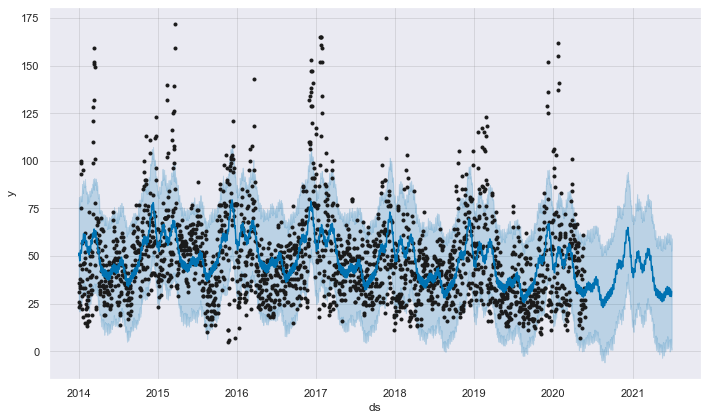

In [40]:
model_pm25_1.plot(forecast1)
plt.show()

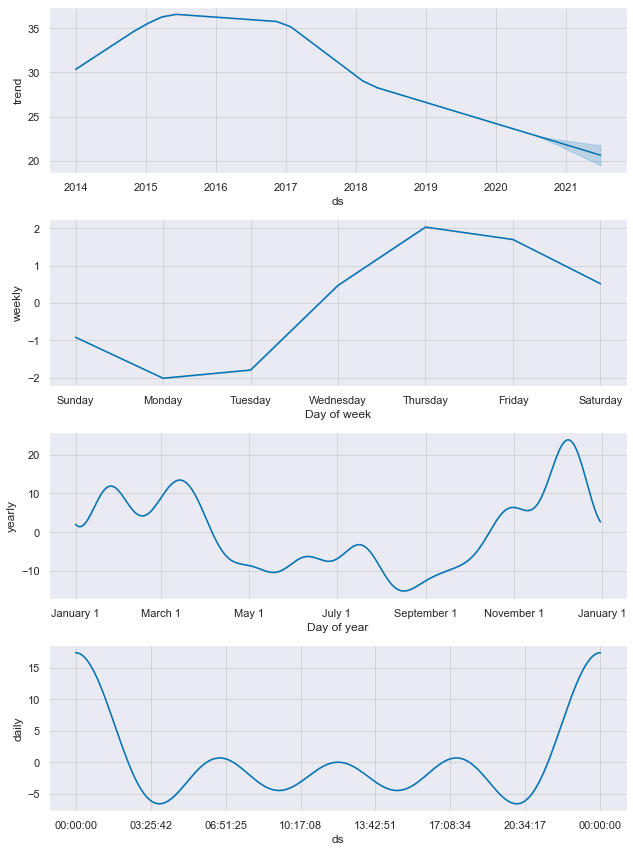

In [41]:
model_pm25_1.plot_components(forecast1)
plt.show()

Comparison of model values with real data 

In [42]:
# This test was done when dialy seasonality was not included in the model 

# rmse_pm25_prophet = rmse(test.y,forecast.yhat)
# rmse_pm25_prophet 

In [43]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm25_1.yhat)
rmse_pm25_prophet_ds 

19.860149025537396

#### Training model on the whole historical data to make a prediction for the future

In [44]:
model_pm25_whole = Prophet(daily_seasonality=False)
# fit the model
model_pm25_whole.fit(pm25)

In [45]:
future_pm25_2022 = model_pm25_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm25_2022 = model_pm25_whole.predict(future_pm25_2022)
forecast_pm25_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3282,2022-12-27,36.207288,13.188860,68.614713,35.388661,36.918509,5.696043,5.696043,5.696043,-1.359057,-1.359057,-1.359057,7.055101,7.055101,7.055101,0.0,0.0,0.0,41.903331
3283,2022-12-28,36.202167,17.818556,70.682492,35.379603,36.917449,6.962866,6.962866,6.962866,0.556680,0.556680,0.556680,6.406187,6.406187,6.406187,0.0,0.0,0.0,43.165033
3284,2022-12-29,36.197045,15.419410,70.930113,35.370549,36.916389,8.075197,8.075197,8.075197,2.240415,2.240415,2.240415,5.834783,5.834783,5.834783,0.0,0.0,0.0,44.272242
3285,2022-12-30,36.191923,16.268065,68.823463,35.361496,36.914098,6.926569,6.926569,6.926569,1.580135,1.580135,1.580135,5.346434,5.346434,5.346434,0.0,0.0,0.0,43.118492
3286,2022-12-31,36.186802,14.694492,69.116012,35.352442,36.910284,5.077509,5.077509,5.077509,0.132323,0.132323,0.132323,4.945186,4.945186,4.945186,0.0,0.0,0.0,41.264311


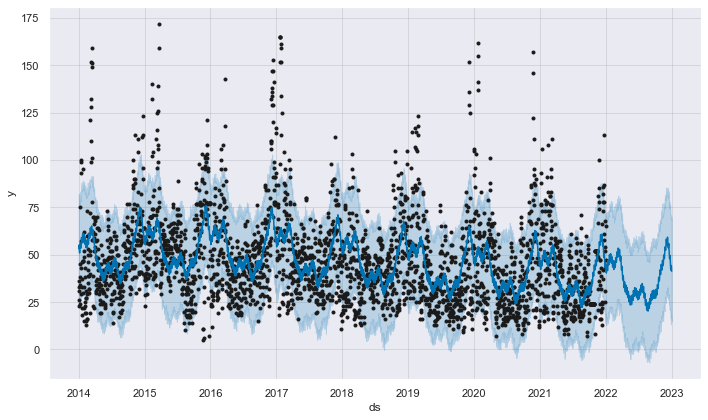

In [46]:
model_pm25_whole.plot(forecast_pm25_2022)
plt.show()

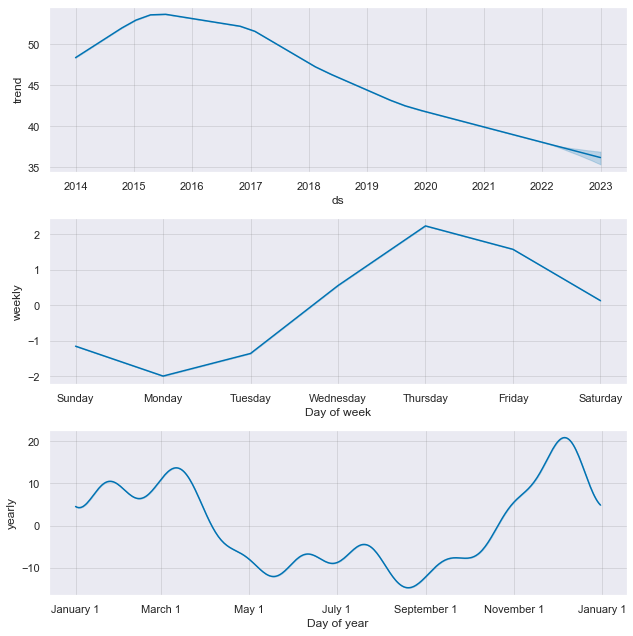

In [47]:
model_pm25_whole.plot_components(forecast_pm25_2022)
plt.show()

#### Time series analysis of PM10

In [49]:
data_pm10=lyon.pm10.tolist()
date_time = lyon.datetime.tolist()
pm10= pd.DataFrame({'ds':date_time, 'y':data_pm10})
pm10.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Stationarity

In [50]:
result = adfuller(pm10.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -14.65
5% Critical Value: -2.86
p-value: 0.00


In [51]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -1.465231e+01              Test Statistics
1  3.484747e-27                      p-value
2  4.000000e+00             No. of lags used
3  2.917000e+03  Number of observations used
4 -3.432594e+00          critical value (1%)
5 -2.862531e+00          critical value (5%)
6 -2.567298e+00         critical value (10%)


In [ ]:
'''As in case of PM2.5, the PM10 data is stationary'''

'As in case of PM2.5, the PM10 data is stationary'

Auto and partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


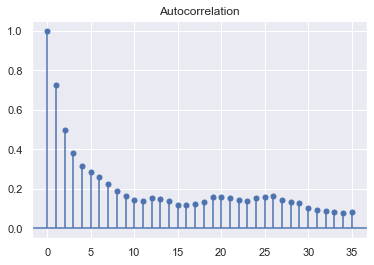

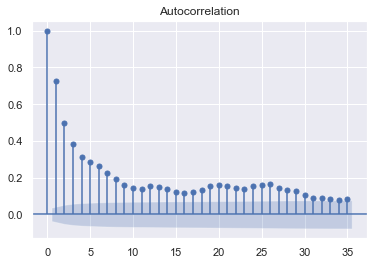

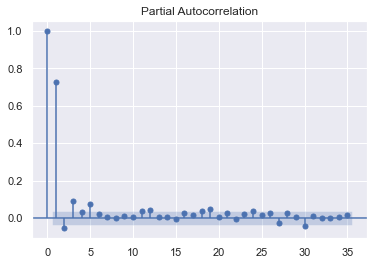

In [52]:
pmdarima.plot_acf(pm10.y)
plot_acf(pm10.y)
plt.show()
plot_pacf(pm10.y)
plt.show()

TREN LINE - Decomposition 

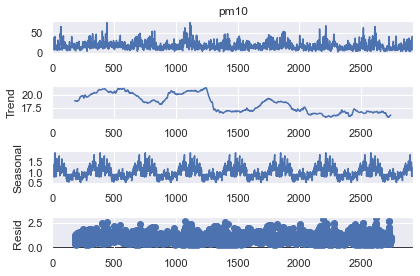

In [54]:
decompose = seasonal_decompose(lyon.pm10,model='multiplicative', period=365)
decompose.plot()
plt.show()

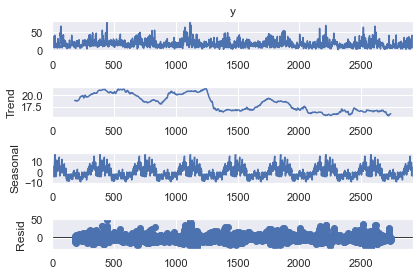

In [55]:
decompose_pm_add = seasonal_decompose(pm10.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

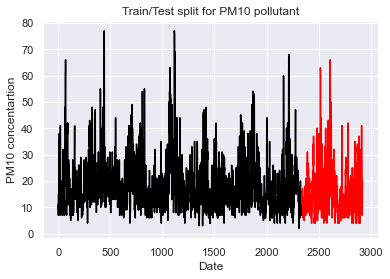

In [56]:
train = pm10[:2338]
test = pm10[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM10 pollutant")
plt.ylabel("PM10 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis 

In [57]:
# define the model
model_pm10_1 = Prophet(daily_seasonality=False)
# fit the model
model_pm10_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  13.628458    0.717007   25.203388
1 2020-05-28  13.482063    2.062608   25.587920
2 2020-05-29  11.935621    0.665711   24.622051
3 2020-05-30  10.785234   -1.511461   22.750759
4 2020-05-31  11.889329   -0.443202   24.027644


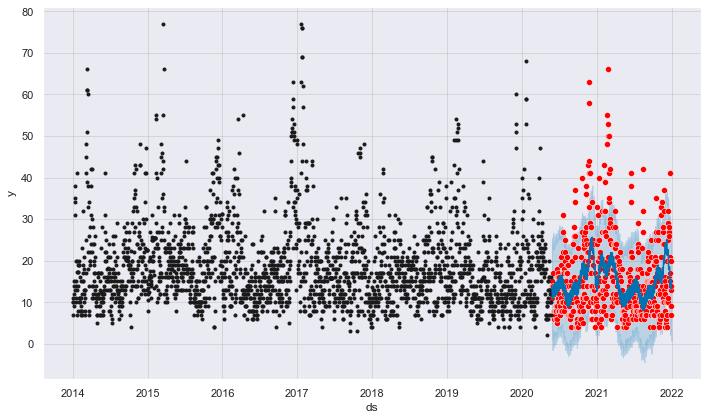

In [58]:
forecast_pm10_1 = model_pm10_1.predict(test)
# summarize the forecast
print(forecast_pm10_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm10_1.plot(forecast_pm10_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [59]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm10_1.yhat)
rmse_pm25_prophet_ds 

9.166436481758957

Training model on the whole dataset

In [60]:
model_pm10_whole = Prophet(daily_seasonality=True)
# fit the model
model_pm10_whole.fit(pm10)

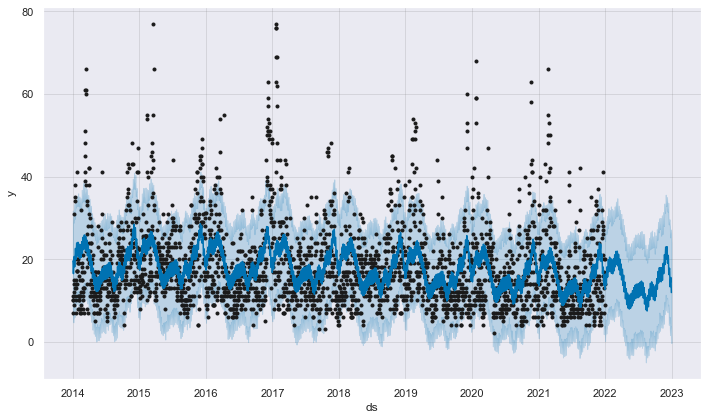

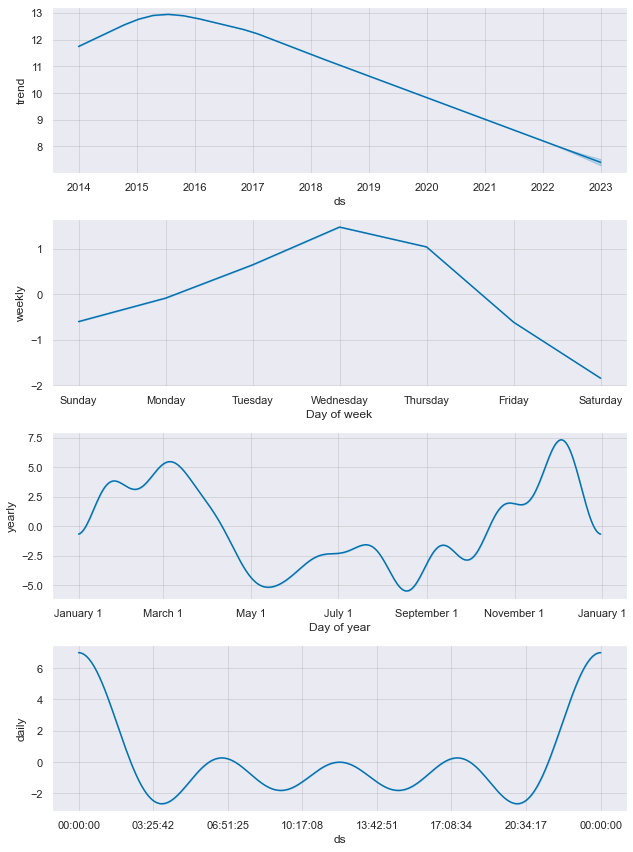

In [61]:
future_pm10_2022 = model_pm10_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm10_2022 = model_pm10_whole.predict(future_pm10_2022)
forecast_pm10_2022.tail()

model_pm10_whole.plot(forecast_pm10_2022)
plt.show()

model_pm10_whole.plot_components(forecast_pm10_2022)
plt.show()

## O3

In [62]:
data_o3=lyon.o3.tolist()
date_time = lyon.datetime.tolist()
o3= pd.DataFrame({'ds':date_time, 'y':data_o3})
o3.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [63]:
o3.head()

,ds,y
0,2014-01-01,23.0
1,2014-01-02,10.0
2,2014-01-03,15.0
3,2014-01-04,20.0
4,2014-01-05,17.0


Stationarity

In [64]:
result = adfuller(o3.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.34
5% Critical Value: -2.86
p-value: 0.01


In [65]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -3.336707              Test Statistics
1     0.013315                      p-value
2    23.000000             No. of lags used
3  2898.000000  Number of observations used
4    -3.432608          critical value (1%)
5    -2.862538          critical value (5%)
6    -2.567301         critical value (10%)


In [66]:
#Data is stationary

Autocorrelation and Partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


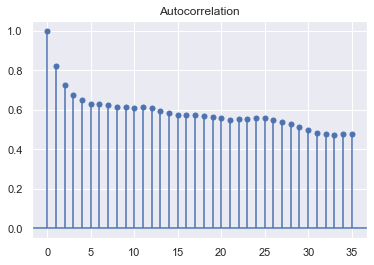

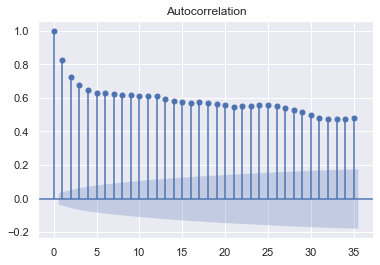

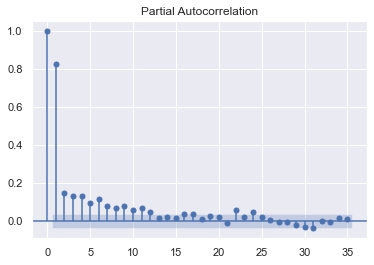

In [67]:
pmdarima.plot_acf(o3.y)
plot_acf(o3.y)
plt.show()
plot_pacf(o3.y)
plt.show()

TREND LINE

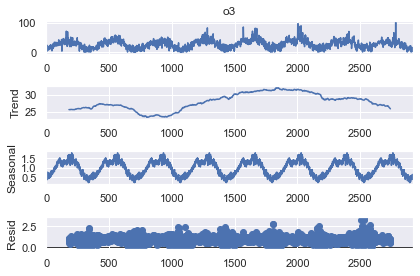

In [69]:
decompose = seasonal_decompose(lyon.o3,model='multiplicative', period=365)
decompose.plot()
plt.show()

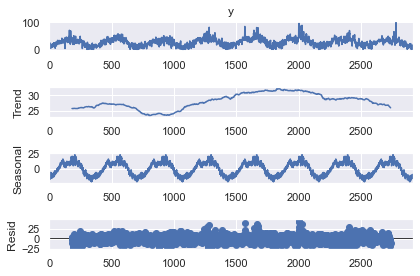

In [70]:
decompose_pm_add = seasonal_decompose(o3.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train test split

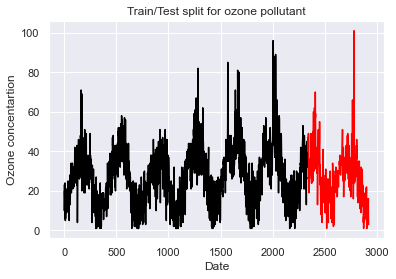

In [71]:
train = o3[:2338]
test = o3[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for ozone pollutant")
plt.ylabel("Ozone concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis

In [72]:
# define the model
model_o3_1 = Prophet(daily_seasonality=True)
# fit the model
model_o3_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  39.212402   29.042929   49.256081
1 2020-05-28  39.734674   29.562346   50.046727
2 2020-05-29  40.125564   29.828511   51.030872
3 2020-05-30  40.601822   30.685412   51.118561
4 2020-05-31  39.270944   29.100665   49.835001


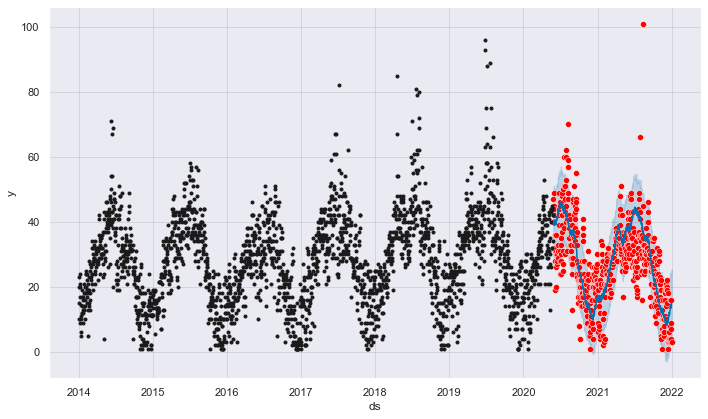

In [73]:
forecast_o3_1 = model_o3_1.predict(test)
# summarize the forecast
print(forecast_o3_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_o3_1.plot(forecast_o3_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [74]:
rmse_o3_prophet_ds = rmse(test.y,forecast_o3_1.yhat)
rmse_o3_prophet_ds 

9.049911397977834

Training on the whole dataset

In [75]:
model_o3_whole = Prophet(daily_seasonality=False)
# fit the model
model_o3_whole.fit(o3)

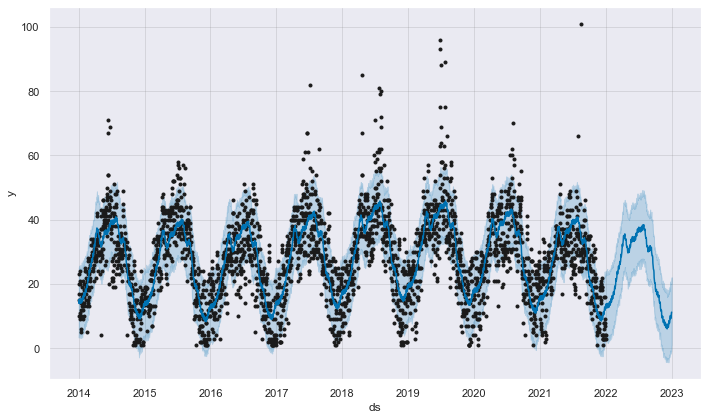

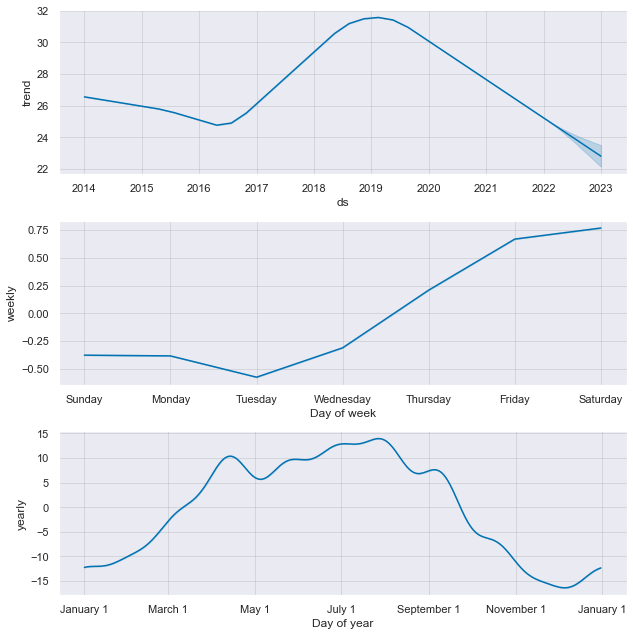

In [76]:
future_o3_2022 = model_o3_whole.make_future_dataframe(periods=365, freq='D')
forecast_o3_2022 = model_o3_whole.predict(future_o3_2022)
forecast_o3_2022.tail()

model_o3_whole.plot(forecast_o3_2022)
plt.show()

model_o3_whole.plot_components(forecast_o3_2022)
plt.show()

## NO2

In [78]:
data_no2=lyon.no2.tolist()
date_time = lyon.datetime.tolist()
no2= pd.DataFrame({'ds':date_time, 'y':data_no2})
no2.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [79]:
no2.head()

,ds,y
0,2014-01-01,14.0
1,2014-01-02,15.0
2,2014-01-03,11.0
3,2014-01-04,15.0
4,2014-01-05,16.0


Stationarity

In [80]:
result = adfuller(no2.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.68
5% Critical Value: -2.86
p-value: 0.00


In [81]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -3.682542              Test Statistics
1     0.004366                      p-value
2    28.000000             No. of lags used
3  2893.000000  Number of observations used
4    -3.432612          critical value (1%)
5    -2.862540          critical value (5%)
6    -2.567302         critical value (10%)


In [ ]:
#data is stationary 

Autocorrelation and Partial Correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


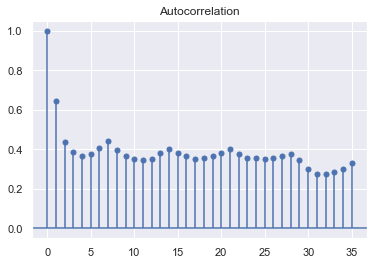

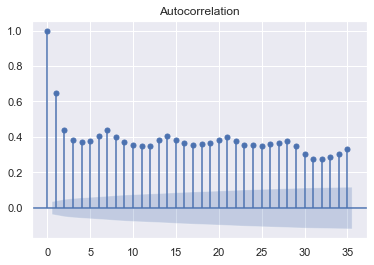

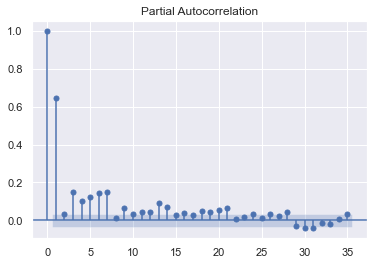

In [82]:
pmdarima.plot_acf(no2.y)
plot_acf(no2.y)
plt.show()
plot_pacf(no2.y)
plt.show()

TREND LINE

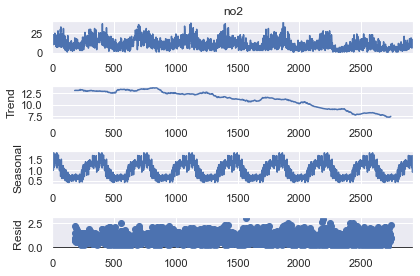

In [84]:
decompose = seasonal_decompose(lyon.no2,model='multiplicative', period=365)
decompose.plot()
plt.show()

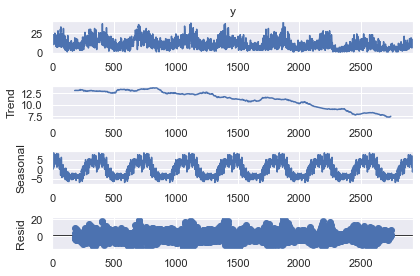

In [85]:
decompose_pm_add = seasonal_decompose(no2.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

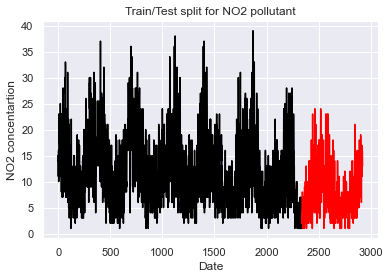

In [86]:
train = no2[:2338]
test = no2[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for NO2 pollutant")
plt.ylabel('NO2 concentartion')
plt.xlabel('Date')
sns.set()
plt.show()

Prophet Analysis

In [87]:
# define the model
model_no2_1 = Prophet(daily_seasonality=False)
# fit the model
model_no2_1.fit(train)

          ds      yhat  yhat_lower  yhat_upper
0 2020-05-27  6.055856   -0.365729   12.853129
1 2020-05-28  6.259692   -0.428270   12.873082
2 2020-05-29  3.809936   -2.928831   10.753712
3 2020-05-30  1.813200   -4.900271    8.348744
4 2020-05-31  4.223182   -2.159628   11.309320


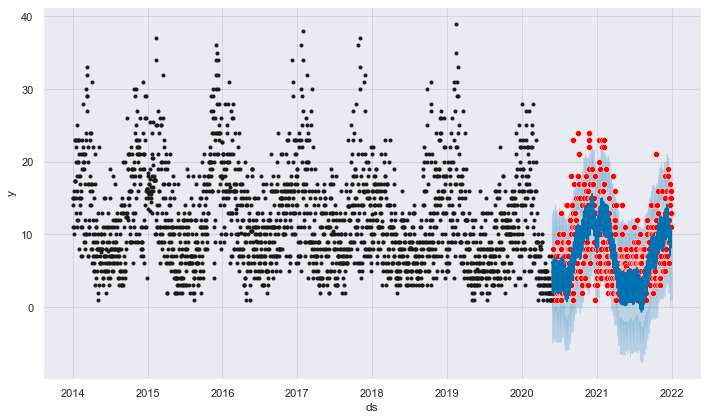

In [88]:
forecast_no2_1 = model_no2_1.predict(test)
# summarize the forecast
print(forecast_no2_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_no2_1.plot(forecast_no2_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [89]:
rmse_no2_prophet_ds = rmse(test.y,forecast_no2_1.yhat)
rmse_no2_prophet_ds 

4.173000405592053

Trainning on the whole data set

In [90]:
model_no2_whole = Prophet(daily_seasonality=False)
# fit the model
model_no2_whole.fit(no2)

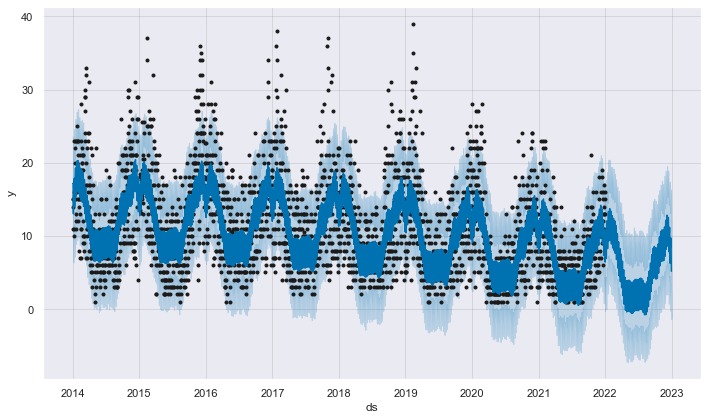

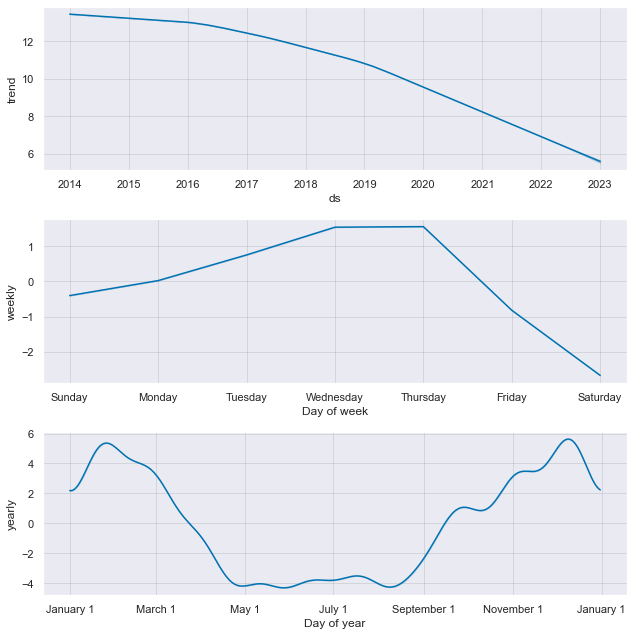

In [91]:
future_no2_2022 = model_no2_whole.make_future_dataframe(periods=365, freq='D')
forecast_no2_2022 = model_no2_whole.predict(future_no2_2022)
forecast_no2_2022.tail()

model_no2_whole.plot(forecast_no2_2022)
plt.show()

model_no2_whole.plot_components(forecast_no2_2022)
plt.show()